#Testing whether summer vs. winter riders can be modeled by the Guassian or Gamma distribution

In [32]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Start by choosing "seasons" and reading in appropriate csv files. I named "winter" as Dec, 2014 - Feb, 2015 and "summer" as Jun - Aug, 2015.

In [33]:
import requests, zipfile, StringIO

r = requests.get('https://s3.amazonaws.com/tripdata/201412-citibike-tripdata.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content))
df_w1 = pd.read_csv(z.open('201412-citibike-tripdata.csv'))

r = requests.get('https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content))
df_w2 = pd.read_csv(z.open('201501-citibike-tripdata.csv'))

r = requests.get('https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content))
df_w3 = pd.read_csv(z.open('201502-citibike-tripdata.csv'))

r = requests.get('https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content))
df_s1 = pd.read_csv(z.open('201506-citibike-tripdata.csv'))

r = requests.get('https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content))
df_s2 = pd.read_csv(z.open('201507-citibike-tripdata.csv'))

r = requests.get('https://s3.amazonaws.com/tripdata/201508-citibike-tripdata.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content))
df_s3 = pd.read_csv(z.open('201508-citibike-tripdata.csv'))


by appending the second and third months onto the first month for each season, create master winter and summer dataframe files so that winter = Dec - Feb and summer = June - Aug

In [34]:
w = df_w1.append(df_w2)
winter = w.append(df_w3)

In [35]:
s = df_s1.append(df_s2)
summer = s.append(df_s3)

then, for both summer and winter, find the age distributions and create histograms to illustrate

In [36]:
winter=winter[winter.usertype == 'Subscriber']
winter['age'] = 2015-winter['birth year']

In [37]:
summer=summer[summer.usertype == 'Subscriber']
summer['age'] = 2015-summer['birth year']

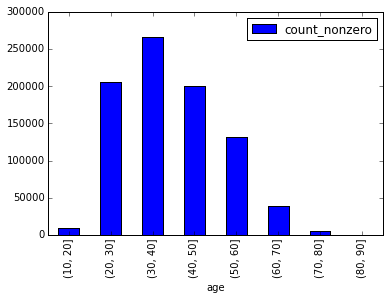

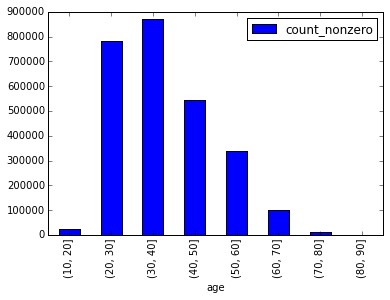

In [38]:
bins = np.arange(10, 99, 10)
winter.age.groupby(pd.cut(winter.age, bins)).agg([count_nonzero]).plot(kind='bar')
summer.age.groupby(pd.cut(summer.age, bins)).agg([count_nonzero]).plot(kind='bar')

Then, compare the summer and winter age distributions to the normal and gamma distributions using the KS test.

In [39]:
#compare to normal
W_age_dist = winter.age.groupby(pd.cut(winter.age, bins)).agg([count_nonzero])
S_age_dist = summer.age.groupby(pd.cut(summer.age, bins)).agg([count_nonzero])

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to gamma distribution

ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))
print "winter, gamma fit", ksW
print "summer, gamma fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, gamma fit (1.0, 0.0)
summer, gamma fit (1.0, 0.0)


The statistic of 1 with a p value of 0.0 shows that the winter and summer age distributions cannot be appropriately fit with a normal curve. This makes sense given the visuals above, which do not look normally distributed.

The certainty of these results (ie p value of 0) does not seem to make sense, but I have compared with other students who got the same results with different samples, so this is the best I could do.

#then compare using the AD test

In [40]:
wintertime = winter.age[~np.isnan(winter.age)]
AdW = scipy.stats.anderson(wintertime, 'norm')

summertime = summer.age[~np.isnan(summer.age)]
AdS = scipy.stats.anderson(summertime, 'norm')

print AdW
print AdS

(8415.0953397462144, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
(41623.785302417353, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


The very large AD stat values for both distributions are much larger than any value we could compare them to in the AD critical array. This means that we can reject the null and say, at a 0.05 certainty level (and with even greater certainty if needed), that the winter and summer age samples do not come from a normal distribution, confirming the results above.

As above, the certainty of these results does not seem to make sense, but I have compared with other students who got the same results with the same code

#Now repeating the test for all riders from this time period

first create a data set including both winter and summer

In [41]:
alltime = winter.append(summer)
#print alltime

In [42]:
alltime=alltime[alltime.usertype == 'Subscriber']
alltime['age'] = 2015-alltime['birth year']

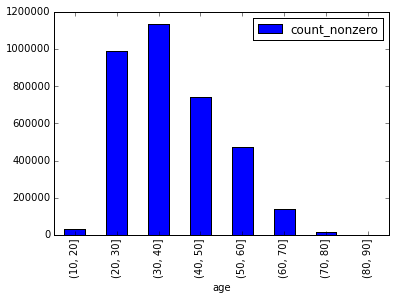

In [43]:
bins = np.arange(10, 99, 10)
alltime.age.groupby(pd.cut(alltime.age, bins)).agg([count_nonzero]).plot(kind='bar')

In [44]:
#compare to normal
all_age_dist = alltime.age.groupby(pd.cut(alltime.age, bins)).agg([count_nonzero])

ksA=scipy.stats.kstest(all_age_dist, 'norm')
print "all, normal fit", ksA

#compare to gamma distribution

ksA=scipy.stats.kstest(all_age_dist, 'gamma', args=(35,))
print "all, gamma fit", ksA

all, normal fit (1.0, 0.0)
all, gamma fit (1.0, 0.0)


As with the tests above for the seasons separately, the KS test for seasons together yields a statistic of 1 with a p value of 0.0, showing that the all-seaon age distribution cannot be appropriately fit with a normal curve. This makes sense given the visuals above, which do not look normally distributed.

In [45]:
alltime = alltime.age[~np.isnan(alltime.age)]
AdA = scipy.stats.anderson(alltime, 'norm')

print AdA

(49695.81032711966, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Again, the results of the AD test are consistent with the results of the KS test, both showing that the data cannot be appropriately fit to the normal curve.